# Chi-Square Test for 2 Categorical Variables

In [7]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Step 1: Read the Excel file using pandas
# excel_file = '/content/drive/MyDrive/Colab Notebooks/data_v3.xlsx'
excel_file = 'data_v3.xlsx'

#excel_file1 = '/content/drive/MyDrive/Colab Notebooks/updated_file_with_demographic.xlsx'

df_quant = pd.read_excel(excel_file, index_col=0, sheet_name='Quantitative_Likert')
df_demo = pd.read_excel(excel_file, index_col=0, sheet_name='Demographic_Cleaned_v3')
#df_demo = pd.read_excel(excel_file1, index_col=0)

df = df_quant.merge(df_demo, left_index=True, right_index=True)


# List out the columns


In [21]:
# only demographic

# desktop_familiarity	laptop_familiarity	smartphone_familiarity	featurephone_familiarity	tablet_familiarity	smartwatch_familiarity	internet_familiarity	internet_quality

# only quantitative
all_quant_columns = [
'whatsapp_usage' , 'messenger_usage' , 'discord_usage' , 'skype_usage' , 'msteams_usage' , 'slack_usage' , 'instagram_usage' , 'snapchat_usage' , 'telegram_usage' , 'reddit_usage' , 'imo_usage' , 'viber_usage' ,
'whatsapp_ui_organization' , 'messenger_ui_organization' , 'discord_ui_organization' , 'skype_ui_organization' , 'msteams_ui_organization' , 'slack_ui_organization' , 'instagram_ui_organization' , 'snapchat_ui_organization' , 'telegram_ui_organization' , 'reddit_ui_organization' , 'imo_ui_organization' , 'viber_ui_organization' ,
'whatsapp_response_speed' , 'messenger_response_speed' , 'discord_response_speed' , 'skype_response_speed' , 'msteams_response_speed' , 'slack_response_speed' , 'instagram_response_speed' , 'snapchat_response_speed' , 'telegram_response_speed' , 'reddit_response_speed' , 'imo_response_speed' , 'viber_response_speed' ,
'whatsapp_feature_satisfaction' , 'messenger_feature_satisfaction' , 'discord_feature_satisfaction' , 'skype_feature_satisfaction' , 'msteams_feature_satisfaction' , 'slack_feature_satisfaction' , 'instagram_feature_satisfaction' , 'snapchat_feature_satisfaction' , 'telegram_feature_satisfaction' , 'reddit_feature_satisfaction' , 'imo_feature_satisfaction' , 'viber_feature_satisfaction' ,
'whatsapp_privacy_invasion' , 'messenger_privacy_invasion' , 'discord_privacy_invasion' , 'skype_privacy_invasion' , 'msteams_privacy_invasion' , 'slack_privacy_invasion' , 'instagram_privacy_invasion' , 'snapchat_privacy_invasion' , 'telegram_privacy_invasion' , 'reddit_privacy_invasion' , 'imo_privacy_invasion' , 'viber_privacy_invasion' ,
'whatsapp_cyberbullying' , 'messenger_cyberbullying' , 'discord_cyberbullying' , 'skype_cyberbullying' , 'msteams_cyberbullying' , 'slack_cyberbullying' , 'instagram_cyberbullying' , 'snapchat_cyberbullying' , 'telegram_cyberbullying' , 'reddit_cyberbullying' , 'imo_cyberbullying' , 'viber_cyberbullying' ,
'whatsapp_ad_personalization' , 'messenger_ad_personalization' , 'discord_ad_personalization' , 'skype_ad_personalization' , 'msteams_ad_personalization' , 'slack_ad_personalization' , 'instagram_ad_personalization' , 'snapchat_ad_personalization' , 'telegram_ad_personalization' , 'reddit_ad_personalization' , 'imo_ad_personalization' , 'viber_ad_personalization' ,
'whatsapp_misinformation' , 'messenger_misinformation' , 'discord_misinformation' , 'skype_misinformation' , 'msteams_misinformation' , 'slack_misinformation' , 'instagram_misinformation' , 'snapchat_misinformation' , 'telegram_misinformation' , 'reddit_misinformation' , 'imo_misinformation' , 'viber_misinformation' ,
'whatsapp_identity_theft' , 'messenger_identity_theft' , 'discord_identity_theft' , 'skype_identity_theft' , 'msteams_identity_theft' , 'slack_identity_theft' , 'instagram_identity_theft' , 'snapchat_identity_theft' , 'telegram_identity_theft' , 'reddit_identity_theft' , 'imo_identity_theft' , 'viber_identity_theft' ,
'whatsapp_location_tracking' , 'messenger_location_tracking' , 'discord_location_tracking' , 'skype_location_tracking' , 'msteams_location_tracking' , 'slack_location_tracking' , 'instagram_location_tracking' , 'snapchat_location_tracking' , 'telegram_location_tracking' , 'reddit_location_tracking' , 'imo_location_tracking' , 'viber_location_tracking' ,
'whatsapp_data_misuse' , 'messenger_data_misuse' , 'discord_data_misuse' , 'skype_data_misuse' , 'msteams_data_misuse' , 'slack_data_misuse' , 'instagram_data_misuse' , 'snapchat_data_misuse' , 'telegram_data_misuse' , 'reddit_data_misuse' , 'imo_data_misuse' , 'viber_data_misuse' ,
'whatsapp_content_findability' , 'messenger_content_findability' , 'discord_content_findability' , 'skype_content_findability' , 'msteams_content_findability' , 'slack_content_findability' , 'instagram_content_findability' , 'snapchat_content_findability' , 'telegram_content_findability' , 'reddit_content_findability' , 'imo_content_findability' , 'viber_content_findability' ,
'whatsapp_content_loss' , 'messenger_content_loss' , 'discord_content_loss' , 'skype_content_loss' , 'msteams_content_loss' , 'slack_content_loss' , 'instagram_content_loss' , 'snapchat_content_loss' , 'telegram_content_loss' , 'reddit_content_loss' , 'imo_content_loss' , 'viber_content_loss' ,
'whatsapp_login_issues' , 'messenger_login_issues' , 'discord_login_issues' , 'skype_login_issues' , 'msteams_login_issues' , 'slack_login_issues' , 'instagram_login_issues' , 'snapchat_login_issues' , 'telegram_login_issues' , 'reddit_login_issues' , 'imo_login_issues' , 'viber_login_issues' ,
'whatsapp_unintended_sharing' , 'messenger_unintended_sharing' , 'discord_unintended_sharing' , 'skype_unintended_sharing' , 'msteams_unintended_sharing' , 'slack_unintended_sharing' , 'instagram_unintended_sharing' , 'snapchat_unintended_sharing' , 'telegram_unintended_sharing' , 'reddit_unintended_sharing' , 'imo_unintended_sharing' , 'viber_unintended_sharing' ,
'whatsapp_spam_frequency' , 'messenger_spam_frequency' , 'discord_spam_frequency' , 'skype_spam_frequency' , 'msteams_spam_frequency' , 'slack_spam_frequency' , 'instagram_spam_frequency' , 'snapchat_spam_frequency' , 'telegram_spam_frequency' , 'reddit_spam_frequency' , 'imo_spam_frequency' , 'viber_spam_frequency' ,
'whatsapp_missed_notifications' , 'messenger_missed_notifications' , 'discord_missed_notifications' , 'skype_missed_notifications' , 'msteams_missed_notifications' , 'slack_missed_notifications' , 'instagram_missed_notifications' , 'snapchat_missed_notifications' , 'telegram_missed_notifications' , 'reddit_missed_notifications' , 'imo_missed_notifications' , 'viber_missed_notifications' ,
'whatsapp_notification_satisfaction' , 'messenger_notification_satisfaction' , 'discord_notification_satisfaction' , 'skype_notification_satisfaction' , 'msteams_notification_satisfaction' , 'slack_notification_satisfaction' , 'instagram_notification_satisfaction' , 'snapchat_notification_satisfaction' , 'telegram_notification_satisfaction' , 'reddit_notification_satisfaction' , 'imo_notification_satisfaction' , 'viber_notification_satisfaction' ,

'app_availability_comparison' , 'switching_problems' , 'conversation_tracking_difficulty' , 'miscommunication_issues' , 'communication_delays' , 'generational_difference' ,
'unified_app_desire' ,
'others_switching_problems' , 'others_tracking_difficulty' , 'others_miscommunication' , 'others_communication_delays' , 'others_generational_difference' , 'others_unified_desire' ,
'omnichannel_productivity' , 'omnichannel_time_saving' , 'omnichannel_collaboration' , 'omnichannel_communication_gap' , 'omnichannel_app_switching' , 'omnichannel_conversation_tracking' , 'omnichannel_dependency' , 'omnichannel_info_overload' , 'omnichannel_downtime_effect' , 'omnichannel_feature_limitation' , 'omnichannel_adoption_difficulty' , 'omnichannel_work_life_balance' , 'omnichannel_privacy' , 'omnichannel_security' , 'omnichannel_data_loss' ,
'omnichannel_integration' ,
'omnichannel_adoption_likelihood' ,
'omnichannel_adoption_prediction',
'legal_framework_adequacy']

columns_to_test3 = ['age_generation', 'education', 'internet_familiarity', 'internet_quality','whatsapp_ui_organization' , 'messenger_ui_organization' , 'discord_ui_organization' , 'skype_ui_organization' , 'msteams_ui_organization' , 'slack_ui_organization' , 'instagram_ui_organization' , 'snapchat_ui_organization' , 'telegram_ui_organization' , 'reddit_ui_organization' , 'imo_ui_organization' , 'viber_ui_organization' , 'whatsapp_response_speed' , 'messenger_response_speed' , 'discord_response_speed' , 'skype_response_speed' , 'msteams_response_speed' , 'slack_response_speed' , 'instagram_response_speed' , 'snapchat_response_speed' , 'telegram_response_speed' , 'reddit_response_speed' , 'imo_response_speed' , 'viber_response_speed' , 'whatsapp_feature_satisfaction' , 'messenger_feature_satisfaction' , 'discord_feature_satisfaction' , 'skype_feature_satisfaction' , 'msteams_feature_satisfaction' , 'slack_feature_satisfaction' , 'instagram_feature_satisfaction' , 'snapchat_feature_satisfaction' , 'telegram_feature_satisfaction' , 'reddit_feature_satisfaction' , 'imo_feature_satisfaction' , 'viber_feature_satisfaction' , 'whatsapp_content_findability' , 'messenger_content_findability' , 'discord_content_findability' , 'skype_content_findability' , 'msteams_content_findability' , 'slack_content_findability' , 'instagram_content_findability' , 'snapchat_content_findability' , 'telegram_content_findability' , 'reddit_content_findability' , 'imo_content_findability' , 'viber_content_findability']


In [22]:
columns_to_test4 = ['age_generation', 'education', 'internet_familiarity', 'internet_quality',
                    'whatsapp_ui_organization' ,'whatsapp_response_speed' ,'whatsapp_feature_satisfaction' ,'whatsapp_content_findability']

In [23]:
app_list = ['whatsapp', 'messenger', 'discord', 'skype', 'msteams', 'slack', 'instagram', 'snapchat', 'telegram', 'reddit', 'imo', 'viber']
demographic_columns = ['age_generation', 'gender', 'education', 'internet_familiarity', 'internet_quality', 'study_major',
                       'desktop_familiarity','laptop_familiarity','smartphone_familiarity','featurephone_familiarity','tablet_familiarity','smartwatch_familiarity',
                       'devices_used_Android / iPhone / Touchscreen phone','devices_used_Desktop Computer / iMac / Mac mini','devices_used_Feature phone (with physical keyboard having no touchscreen)','devices_used_Laptop / Macbook','devices_used_Mobile phone','devices_used_Smartwatch','devices_used_Tablet / iPad']


omnichannel_questions = [['omnichannel_productivity' , 'omnichannel_time_saving' , 'omnichannel_collaboration' , 'omnichannel_communication_gap' , 'omnichannel_app_switching' , 'omnichannel_conversation_tracking'] ,
                         ['omnichannel_dependency' , 'omnichannel_info_overload' , 'omnichannel_downtime_effect' , 'omnichannel_feature_limitation' , 'omnichannel_adoption_difficulty' ],
                         ['omnichannel_work_life_balance' , 'omnichannel_privacy' , 'omnichannel_security' , 'omnichannel_data_loss' , 'omnichannel_integration'] ,
                         ['omnichannel_adoption_likelihood']]
omnichannel_questions_short = [ 'omnichannel_privacy' , 'omnichannel_security', 'omnichannel_adoption_likelihood']

substrings = ['privacy_invasion', 'cyberbullying', 'ad_personalization', 'misinformation', 'identity_theft', 'location_tracking', 'data_misuse']
filtered_items = []
for i in substrings:
  tempList = [item for item in all_quant_columns if i.lower() in item.lower()]
  filtered_items.append(tempList) ## vertical: all app, one question

filtered_items2 = []
for i in app_list:
  tempList = [item for item in all_quant_columns if i.lower() in item.lower()]
  filtered_items2.append(tempList) ## horizontal: one app, all question


## One Demographic Column x Other Quant Columns

In [25]:
for  demo_column in demographic_columns:
    # print(f"Demographic Column: {demo_column}")
    for quant_column in all_quant_columns:
        # Step 2: Create a contingency table
        contingency_table = pd.crosstab(df[demo_column], df[quant_column])
        # Step 3: Perform the chi-square test
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        # Step 4: Calculate Cramér's V
        N = df.shape[0]
        degrees_of_freedom_min = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
        if degrees_of_freedom_min == 0:
            continue
        V = (chi2 / N) ** 0.5 / degrees_of_freedom_min

        # Step 5: Display results
        print(f"Demographic Column: {demo_column}")
        print(f"Quant Column '{quant_column}': ")
        print()
        print("Chi-square statistic:", chi2)
        print("P-value:", p)
        print("Degrees of freedom:", dof)
        print("Cramér's V:", V)
        print()

Demographic Column: age_generation
Quant Column 'whatsapp_usage': 

Chi-square statistic: 4.921095549012078
P-value: 0.8411315759786842
Degrees of freedom: 9
Cramér's V: 0.06317559784463324

Demographic Column: age_generation
Quant Column 'messenger_usage': 

Chi-square statistic: 15.740826390590541
P-value: 0.20339713050716182
Degrees of freedom: 12
Cramér's V: 0.11298797526827124

Demographic Column: age_generation
Quant Column 'discord_usage': 

Chi-square statistic: 5.152146934723256
P-value: 0.7411975993121503
Degrees of freedom: 8
Cramér's V: 0.0969625081310897

Demographic Column: age_generation
Quant Column 'skype_usage': 

Chi-square statistic: 14.591864101683424
P-value: 0.06758443423608995
Degrees of freedom: 8
Cramér's V: 0.16317931620352066

Demographic Column: age_generation
Quant Column 'msteams_usage': 

Chi-square statistic: 14.418086444019302
P-value: 0.07149822405219661
Degrees of freedom: 8
Cramér's V: 0.16220473705370925

Demographic Column: age_generation
Quant Co

In [26]:
from queue import PriorityQueue
import heapq

# Dictionary to store aggregate scores for demographic columns
demo_scores = {}
# List to store all relationships for ranking
all_relationships = []

for demo_column in demographic_columns:
    total_score = 0  # Track aggregate score for each demographic column
    relationships_count = 0

    for quant_column in all_quant_columns:
        # Your existing contingency table and calculations here
        contingency_table = pd.crosstab(df[demo_column], df[quant_column])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        N = df.shape[0]
        degrees_of_freedom_min = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)

        if degrees_of_freedom_min == 0:
            continue

        V = (chi2 / N) ** 0.5 / degrees_of_freedom_min

        # Decision making
        significance = ""
        strength = ""
        if p < 0.05:
            significance = "Statistically Significant"
            if V > 0.60:
                strength = "Strong"
                score = 5
            elif V > 0.40:
                strength = "Relatively Strong"
                score = 4
            elif V > 0.20:
                strength = "Moderate"
                score = 3
            elif V > 0.10:
                strength = "Weak"
                score = 2
            else:
                strength = "Negligible"
                score = 1
        else:
            significance = "Not Statistically Significant"
            score = 0
            strength = "N/A"

        # Store relationship info
        relationship_info = {
            'demo_column': demo_column,
            'quant_column': quant_column,
            'chi2': chi2,
            'p_value': p,
            'cramers_v': V,
            'significance': significance,
            'strength': strength,
            'score': score
        }

        # Add to our tracking lists
        all_relationships.append(relationship_info)
        total_score += score
        relationships_count += 1

        # Print current relationship analysis
        print(f"Demographic Column: {demo_column}")
        print(f"Quant Column '{quant_column}': ")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Cramér's V: {V}")
        print(f"Decision: {significance}, Relationship Strength: {strength}")
        print()

    # Calculate average score for this demographic column
    if relationships_count > 0:
        demo_scores[demo_column] = total_score / relationships_count

# Get top 3 demographic columns
top_3_demos = sorted(demo_scores.items(), key=lambda x: x[1], reverse=True)[:3]

print("\nTop 3 Demographic Columns by Overall Relationship Strength:")
for i, (column, score) in enumerate(top_3_demos, 1):
    print(f"{i}. {column} (Average Score: {score:.2f})")

# Get top 5 strongest individual relationships
print("\nTop 5 Strongest Individual Relationships:")
top_relationships = sorted(all_relationships, key=lambda x: (x['score'], x['cramers_v']), reverse=True)[:5]
for i, rel in enumerate(top_relationships, 1):
    print(f"{i}. {rel['demo_column']} vs {rel['quant_column']}")
    print(f"   Significance: {rel['significance']}")
    print(f"   Strength: {rel['strength']}")
    print(f"   Cramér's V: {rel['cramers_v']:.3f}")
    print()

Demographic Column: age_generation
Quant Column 'whatsapp_usage': 
Chi-square statistic: 4.921095549012078
P-value: 0.8411315759786842
Cramér's V: 0.06317559784463324
Decision: Not Statistically Significant, Relationship Strength: N/A

Demographic Column: age_generation
Quant Column 'messenger_usage': 
Chi-square statistic: 15.740826390590541
P-value: 0.20339713050716182
Cramér's V: 0.11298797526827124
Decision: Not Statistically Significant, Relationship Strength: N/A

Demographic Column: age_generation
Quant Column 'discord_usage': 
Chi-square statistic: 5.152146934723256
P-value: 0.7411975993121503
Cramér's V: 0.0969625081310897
Decision: Not Statistically Significant, Relationship Strength: N/A

Demographic Column: age_generation
Quant Column 'skype_usage': 
Chi-square statistic: 14.591864101683424
P-value: 0.06758443423608995
Cramér's V: 0.16317931620352066
Decision: Not Statistically Significant, Relationship Strength: N/A

Demographic Column: age_generation
Quant Column 'msteams

# Heatmap from Cramer's V (EMRD)

In [27]:
# Sample categorical data
data = df[columns_to_test3]

# Function to calculate Cramér's V for two categorical variables
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def plot_heatmap(data_df, plot_name):
  # Calculate Cramér's V for each pair of categorical variables
  variables = data.columns
  length = len(variables)
  cramers_matrix = np.zeros((len(variables), len(variables)))
  for i in range(len(variables)):
      for j in range(len(variables)):
          confusion_matrix = pd.crosstab(data[variables[i]], data[variables[j]])
          cramers_matrix[i, j] = cramers_v(confusion_matrix)

  # Adjustments for visibility
  plt.figure(figsize=(12, 10))
  sns.heatmap(cramers_matrix, annot=True, annot_kws={"size": 9}, xticklabels=variables, yticklabels=variables)

  # Save the heatmap as an image
  plt.savefig(plot_name + ".png", bbox_inches="tight")
  files.download(plot_name + ".png")

  # Show the plot
  plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3975465057.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3975465057.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3975465057.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3975465057.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3975465057.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22936\3975465057.py:13: RuntimeWarning: 

NameError: name 'files' is not defined

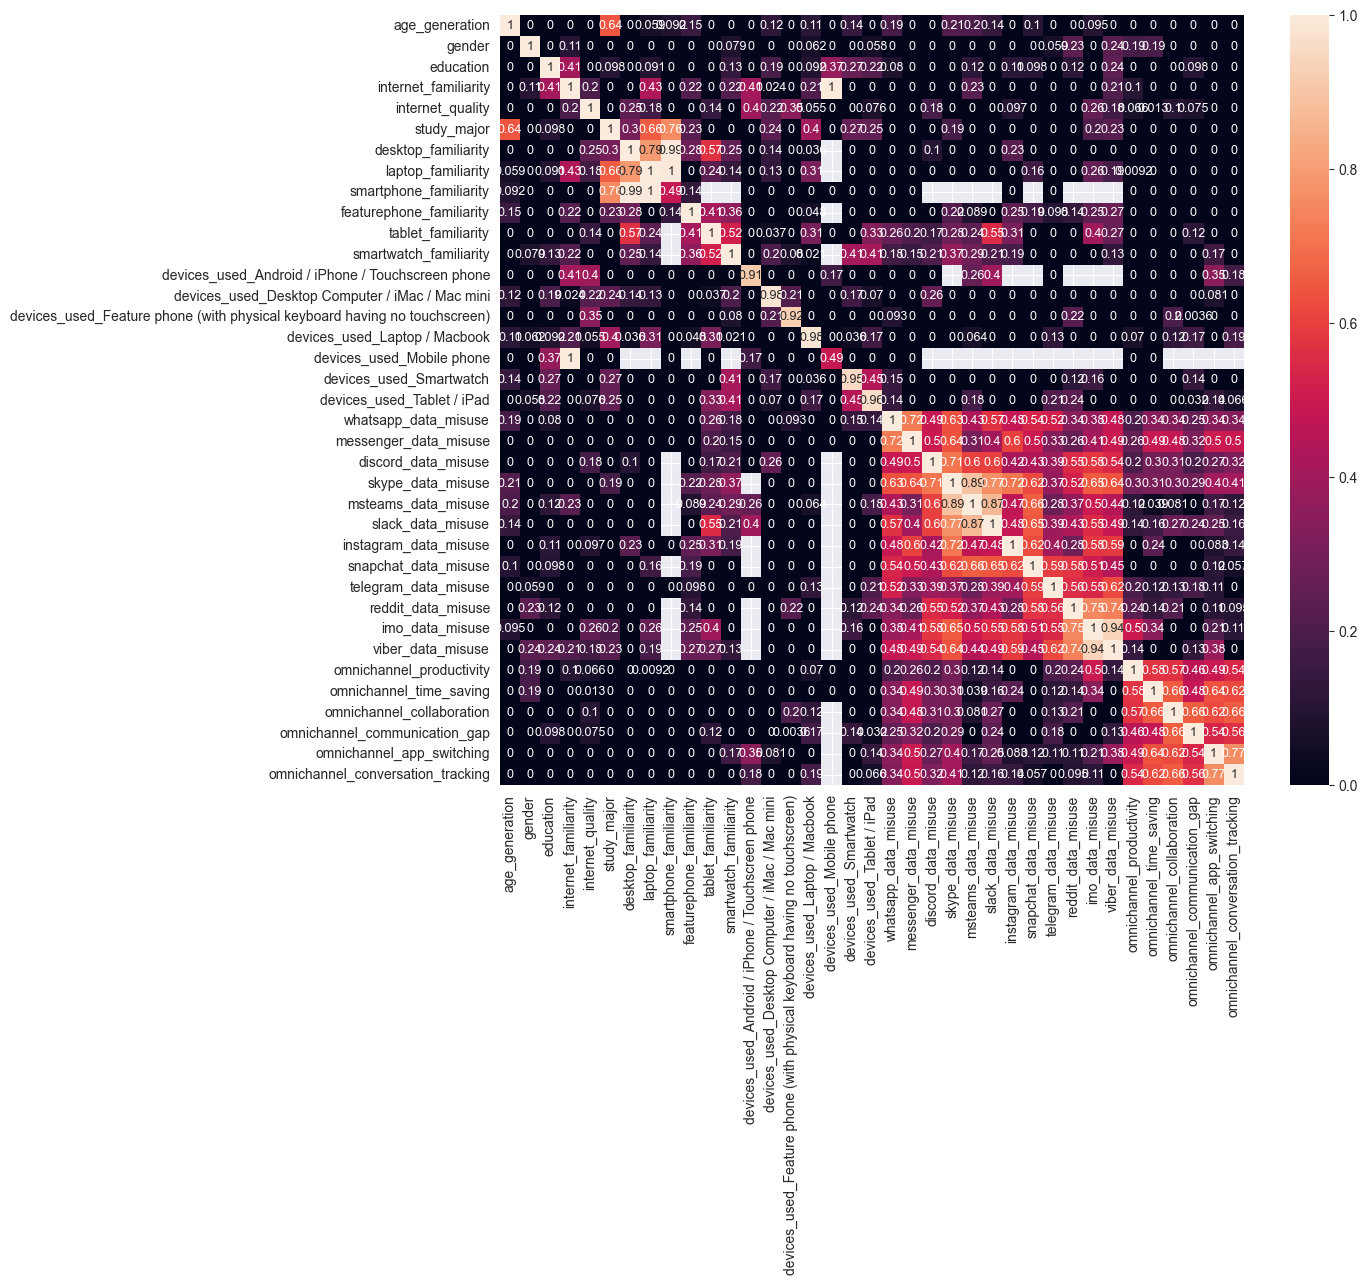

In [28]:
# plot per problem
#for i in range(0,len(substrings)):
for i in range(6,7):
  temp = filtered_items[i]
  for j in range(len(omnichannel_questions)):
    combined_columns = demographic_columns + temp + omnichannel_questions[j]
    data = df[combined_columns]
    plot_heatmap(data, substrings[i]+"_"+str(j))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

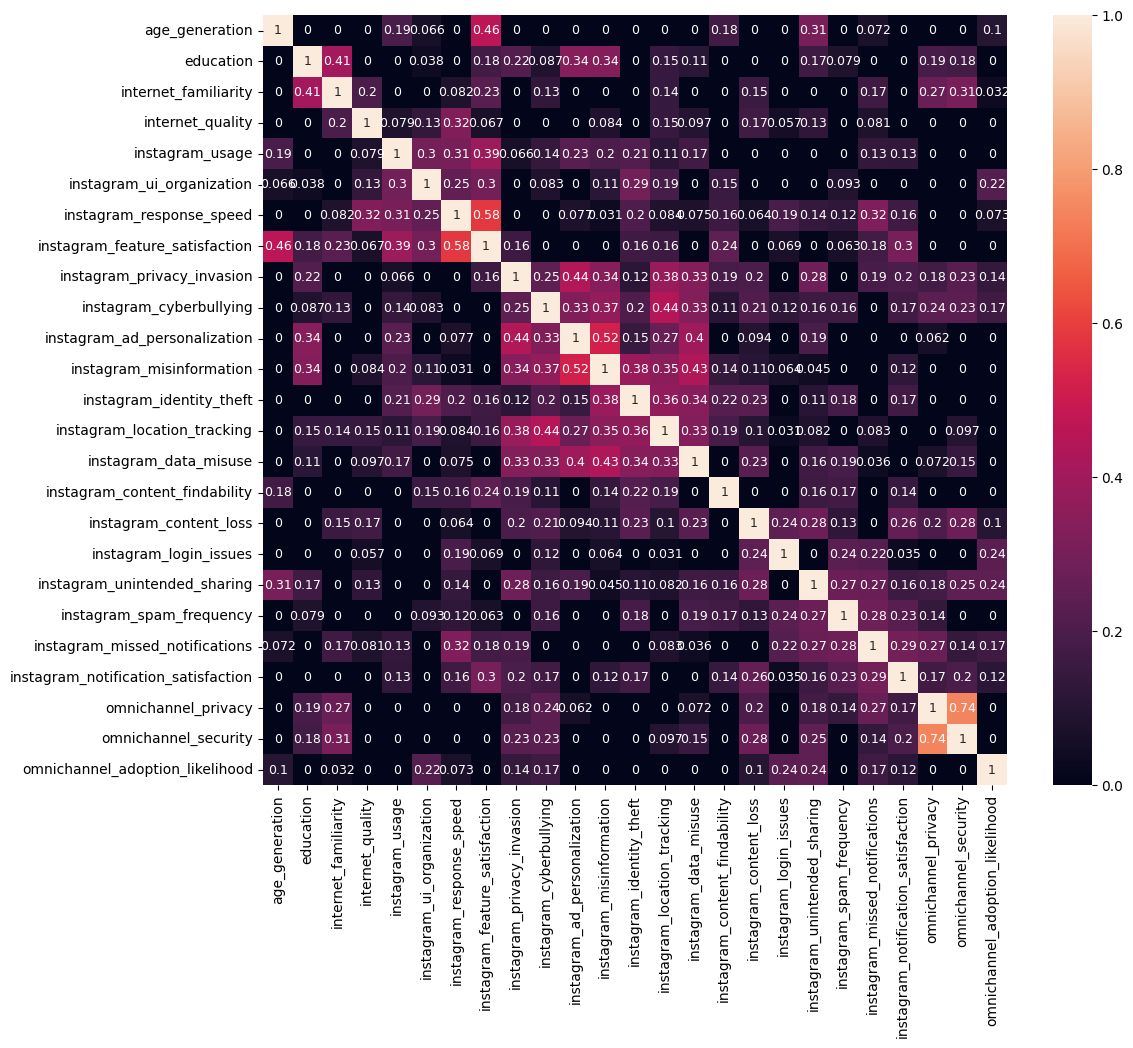

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

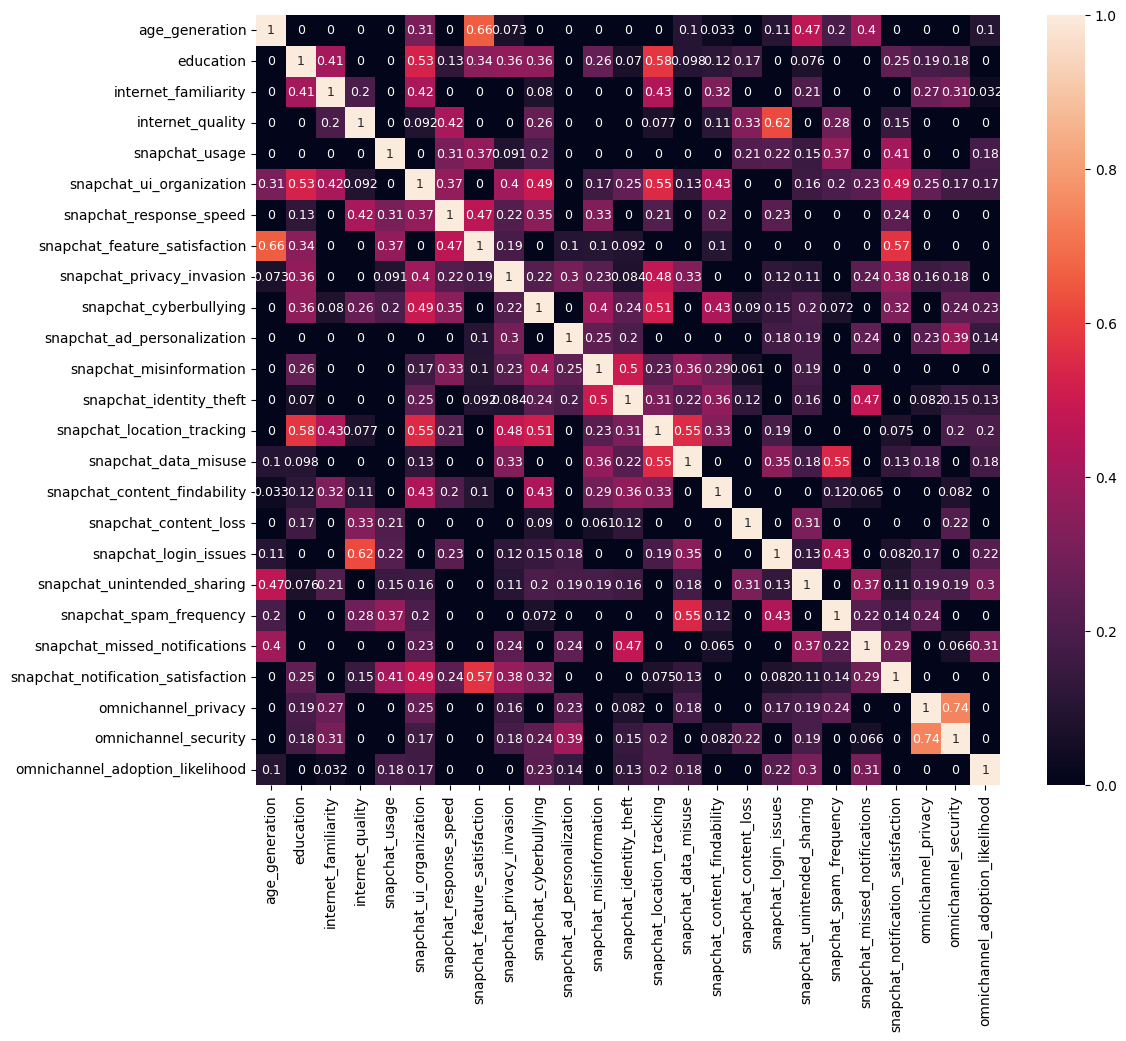

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

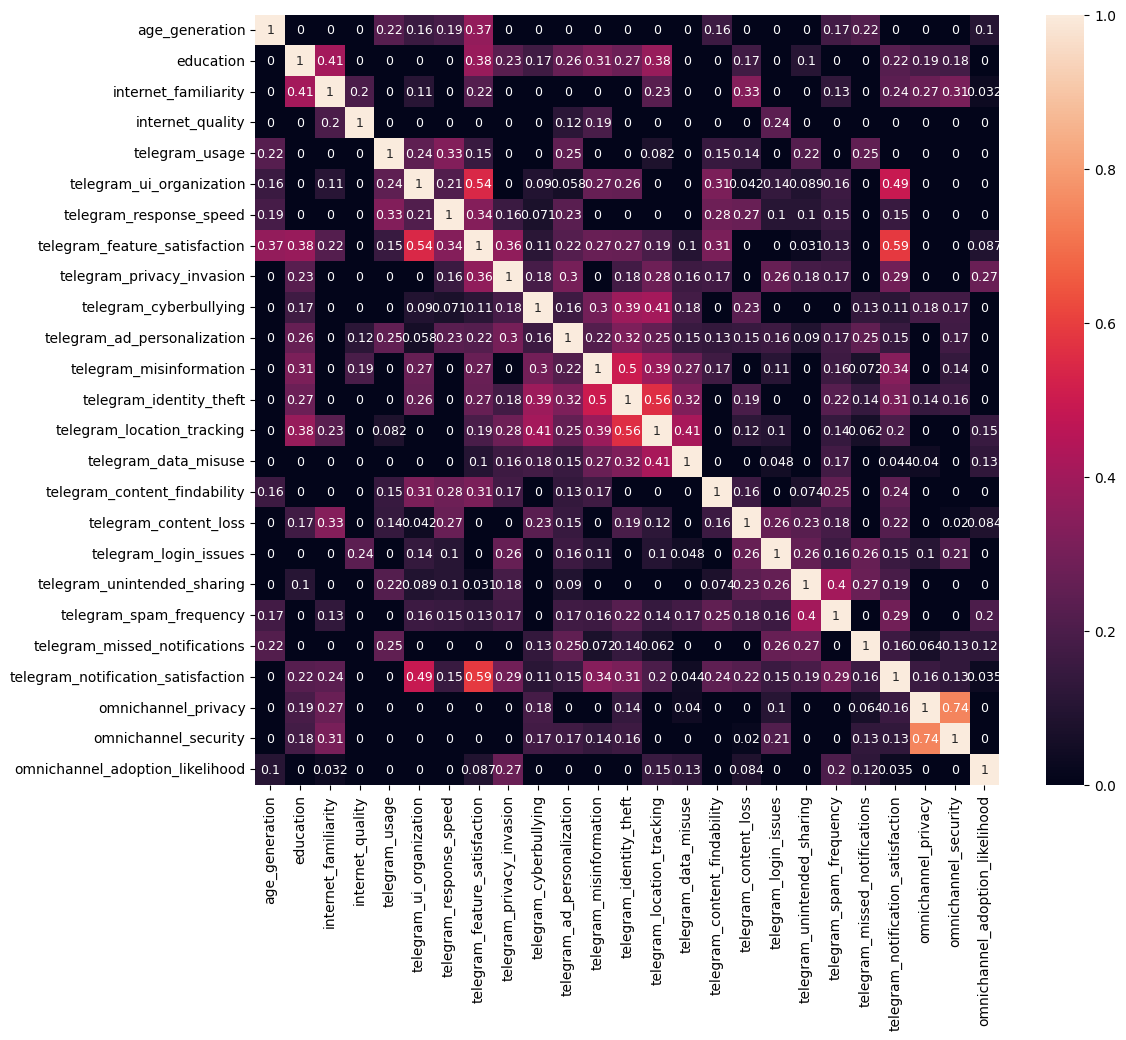

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

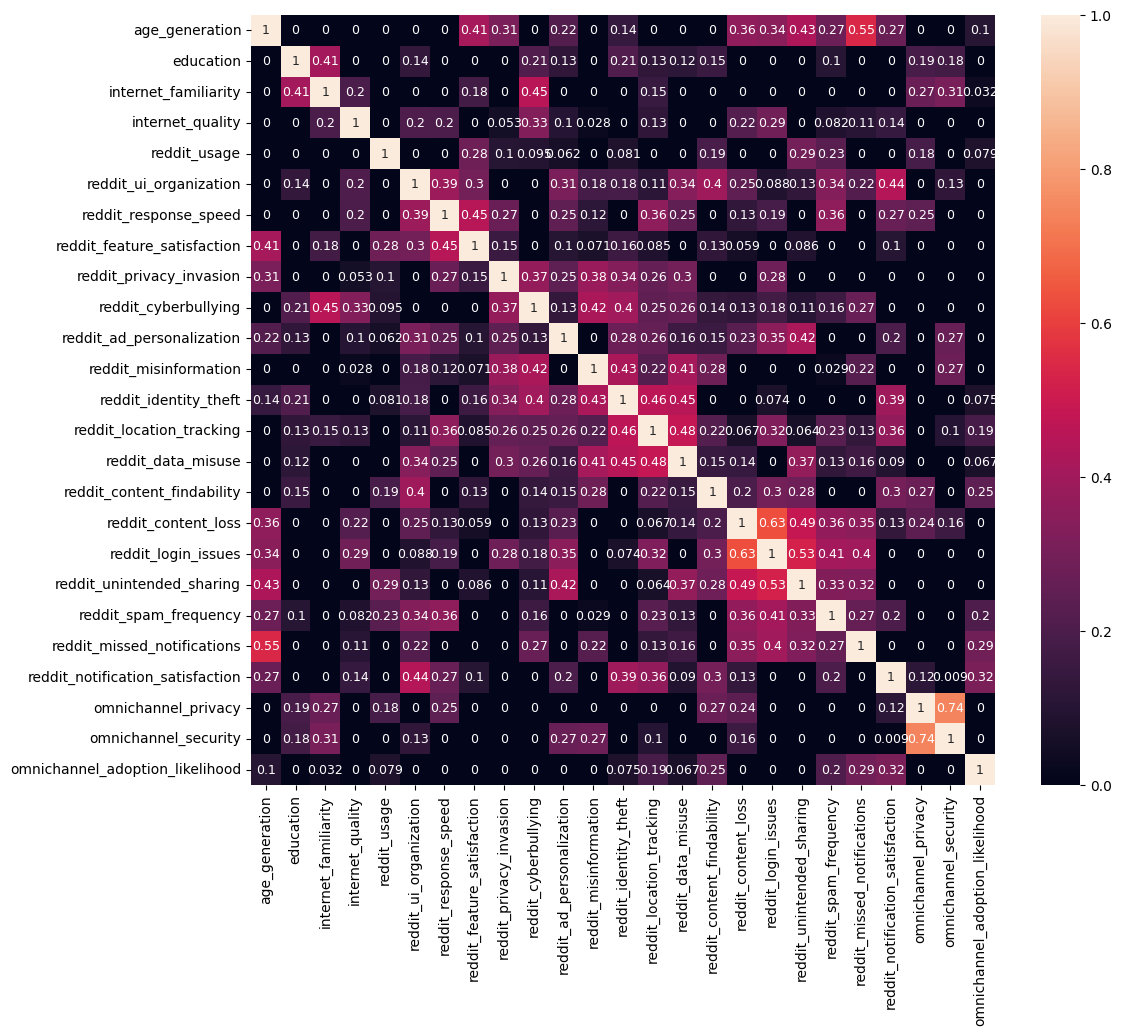

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

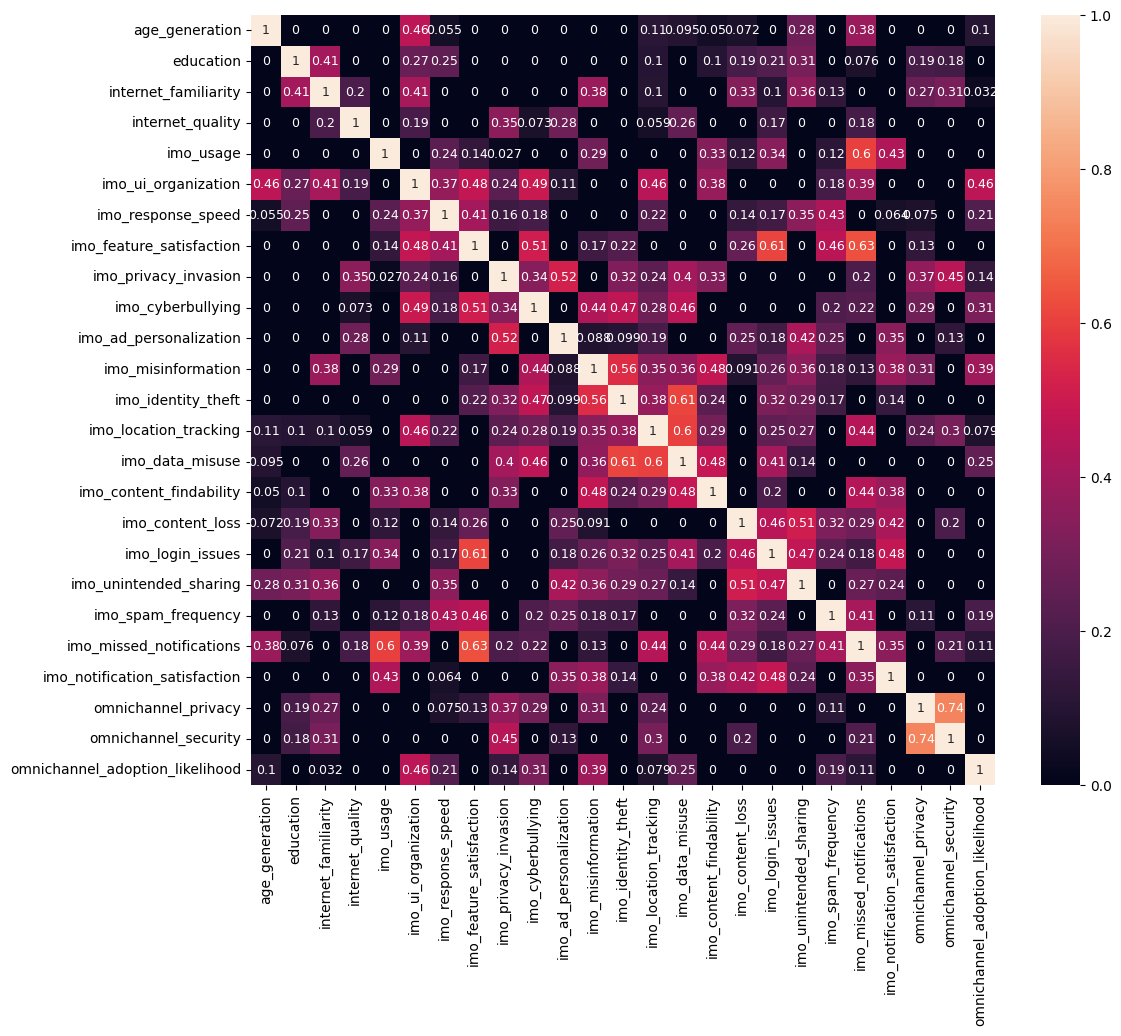

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

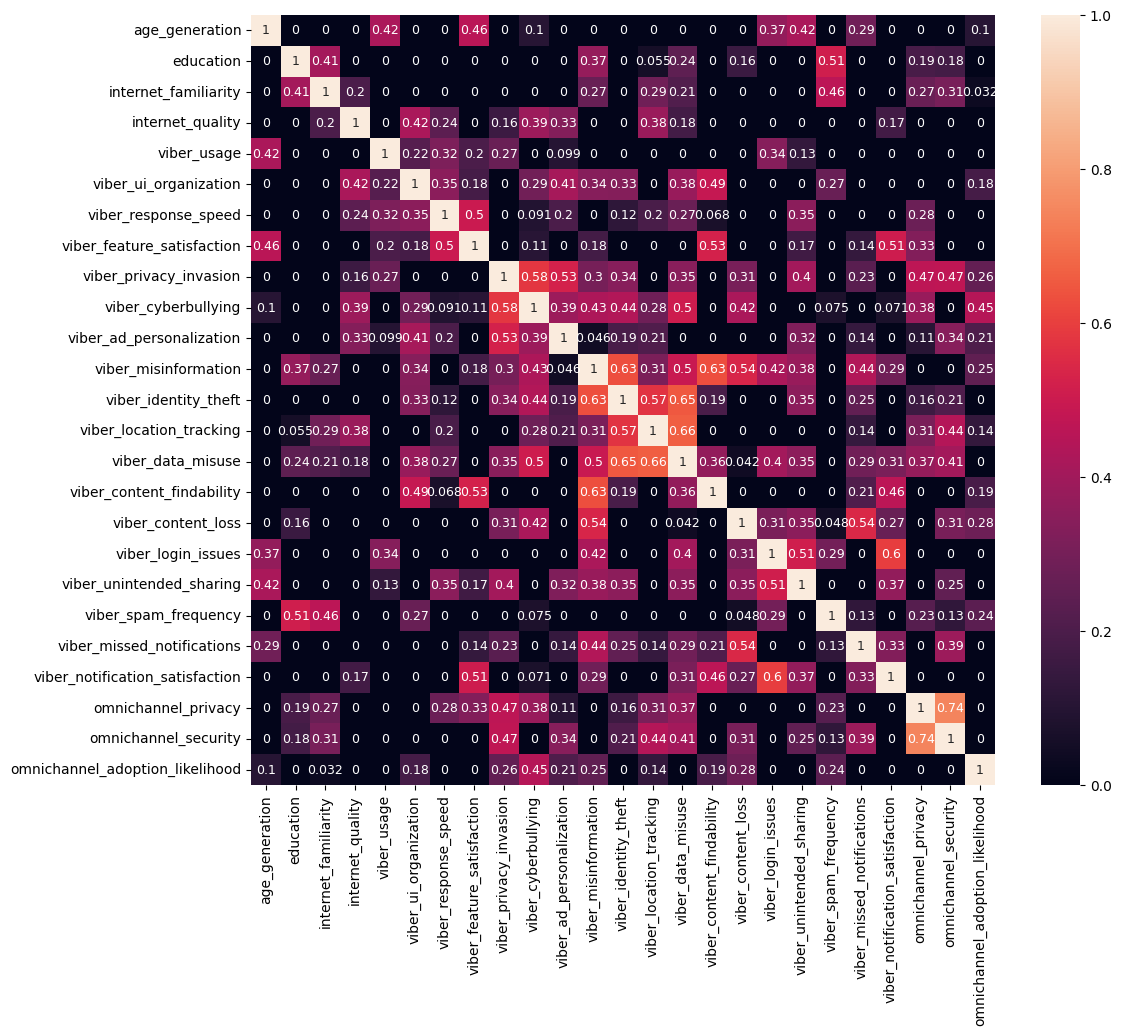

In [ ]:
#Plot for per app
#for i in range(4,len(substrings)):
for i in range(6,12):
  temp = filtered_items2[i]
  for j in range(1): #range(len(omnichannel_questions)):
    combined_columns = demographic_columns + temp + omnichannel_questions_short
    data = df[combined_columns]
    plot_heatmap(data, app_list[i]+"_v1_"+str(j))

['whatsapp', 'messenger', 'discord', 'skype', 'msteams', 'slack', 'instagram', 'snapchat', 'telegram', 'reddit', 'imo', 'viber']


In [ ]:
variables

Index(['whatsapp_usage', 'messenger_usage', 'discord_usage', 'skype_usage',
       'msteams_usage', 'slack_usage', 'instagram_usage', 'snapchat_usage',
       'telegram_usage', 'reddit_usage',
       ...
       'omnichannel_feature_limitation', 'omnichannel_adoption_difficulty',
       'omnichannel_work_life_balance', 'omnichannel_privacy',
       'omnichannel_security', 'omnichannel_data_loss',
       'omnichannel_integration', 'omnichannel_adoption_likelihood',
       'omnichannel_adoption_prediction', 'legal_framework_adequacy'],
      dtype='object', length=248)

In [ ]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.7 MB/s eta 0:00:00


# cramers_matrix

In [ ]:
matrix_to_save = np.vstack([variables, cramers_matrix])
new_column = variables.insert(0, "")

matrix_to_save = np.column_stack([new_column, matrix_to_save])
matrix = pd.DataFrame(matrix_to_save)

# Specify the Excel file name
excel_file = "/content/drive/MyDrive/Colab Notebooks/matrix_data_EMR_All.xlsx"
with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
    matrix.to_excel(writer, index=False, header=False)

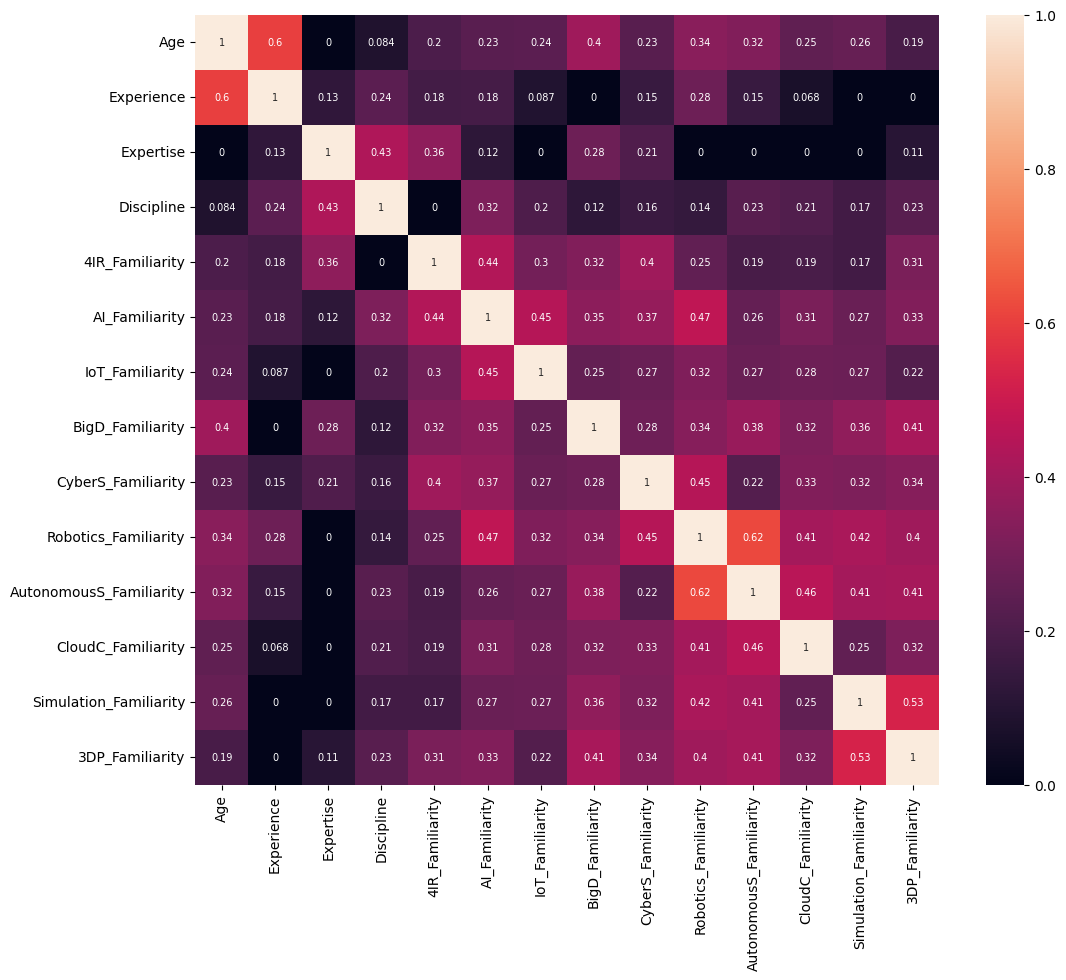

In [ ]:
# Adjustments for visibility
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, annot_kws={"size": 7}, xticklabels=variables, yticklabels=variables)

# Save the heatmap as an image
plt.savefig("heatmap.png", bbox_inches="tight")

# Show the plot
plt.show()

# Network Graph

In [ ]:
import pandas as pd

# Open Dataset
path = "/content/drive/MyDrive/Colab Notebooks/Graph.xlsx"
df1 = pd.read_excel(path, index_col=0, sheet_name='EMRD_AB')

column_names = list(df1.columns.values)
att_names=list(df1.columns.values)
att_names.remove(att_names[0])
size_col=len(column_names)
size_att=len(att_names)

i=0
while(i<size_att):
    print("G.add_node(\""+ att_names[i] +"\")")
    i=i+1

for row in range(size_col-1):
    for col in range(size_col-1):
        node1 = column_names[row+1]
        node2 = column_names[col+1]
        value = df1.iloc[row, col+1]
        if(value<0.05 and value>0):
            if(value<0.05 and value>0.01):
                print("G.add_edge(\"" + node1 + "\" , \"" + node2 + "\" , color=\'g\',weight=0.5)")
            elif(value<0.01 and value>0.001):
                print("G.add_edge(\"" + node1 + "\" , \"" + node2 + "\" , color=\'g\',weight=1.5)")
            elif (value < 0.001):
                print("G.add_edge(\"" + node1 + "\" , \"" + node2 + "\" , color=\'g\',weight=2.5)")
    print()

G.add_node("T.Adp")
G.add_node("IOE")
G.add_node("BCG")
G.add_node("IPLMD")
G.add_node("OSCM")
G.add_node("IKSCW")
G.add_node("FA")
G.add_node("IDADM")
G.add_node("BCE")
G.add_node("EPI")
G.add_node("IP")
G.add_node("ESM")




G.add_edge("OSCM" , "IOE" , color='g',weight=1.5)

G.add_edge("IKSCW" , "IOE" , color='g',weight=1.5)
G.add_edge("IKSCW" , "IPLMD" , color='g',weight=1.5)

G.add_edge("FA" , "BCG" , color='g',weight=2.5)
G.add_edge("FA" , "IPLMD" , color='g',weight=0.5)

G.add_edge("IDADM" , "BCG" , color='g',weight=2.5)
G.add_edge("IDADM" , "IPLMD" , color='g',weight=0.5)
G.add_edge("IDADM" , "OSCM" , color='g',weight=2.5)
G.add_edge("IDADM" , "IKSCW" , color='g',weight=1.5)

G.add_edge("BCE" , "IPLMD" , color='g',weight=1.5)
G.add_edge("BCE" , "OSCM" , color='g',weight=1.5)
G.add_edge("BCE" , "IKSCW" , color='g',weight=1.5)
G.add_edge("BCE" , "FA" , color='g',weight=2.5)

G.add_edge("EPI" , "BCG" , color='g',weight=2.5)
G.add_edge("EPI" , "FA" , color='g',weight=1.5)

G.add_edg

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


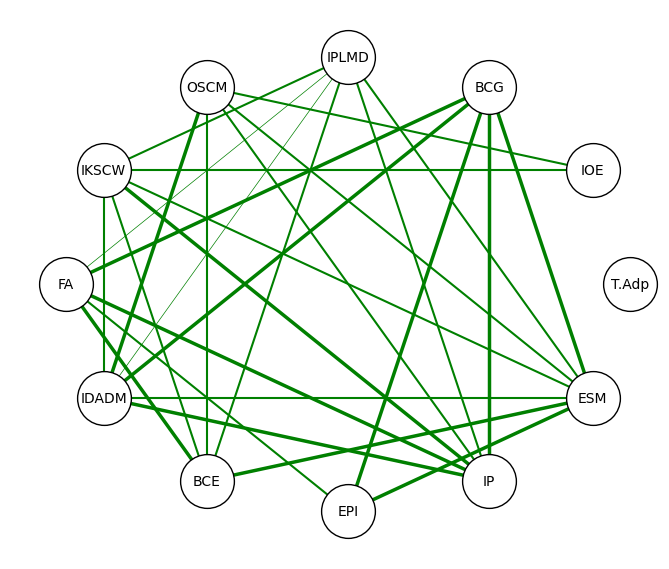

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import clique

plt.rcParams["figure.figsize"] = [6.50, 5.50]
plt.rcParams["figure.autolayout"] = True

G = nx.Graph()

G.add_node("T.Adp")
G.add_node("IOE")
G.add_node("BCG")
G.add_node("IPLMD")
G.add_node("OSCM")
G.add_node("IKSCW")
G.add_node("FA")
G.add_node("IDADM")
G.add_node("BCE")
G.add_node("EPI")
G.add_node("IP")
G.add_node("ESM")




G.add_edge("OSCM" , "IOE" , color='g',weight=1.5)

G.add_edge("IKSCW" , "IOE" , color='g',weight=1.5)
G.add_edge("IKSCW" , "IPLMD" , color='g',weight=1.5)

G.add_edge("FA" , "BCG" , color='g',weight=2.5)
G.add_edge("FA" , "IPLMD" , color='g',weight=0.5)

G.add_edge("IDADM" , "BCG" , color='g',weight=2.5)
G.add_edge("IDADM" , "IPLMD" , color='g',weight=0.5)
G.add_edge("IDADM" , "OSCM" , color='g',weight=2.5)
G.add_edge("IDADM" , "IKSCW" , color='g',weight=1.5)

G.add_edge("BCE" , "IPLMD" , color='g',weight=1.5)
G.add_edge("BCE" , "OSCM" , color='g',weight=1.5)
G.add_edge("BCE" , "IKSCW" , color='g',weight=1.5)
G.add_edge("BCE" , "FA" , color='g',weight=2.5)

G.add_edge("EPI" , "BCG" , color='g',weight=2.5)
G.add_edge("EPI" , "FA" , color='g',weight=1.5)


G.add_edge("IP" , "BCG" , color='g',weight=2.5)
G.add_edge("IP" , "IPLMD" , color='g',weight=1.5)
G.add_edge("IP" , "OSCM" , color='g',weight=1.5)
G.add_edge("IP" , "IKSCW" , color='g',weight=2.5)
G.add_edge("IP" , "FA" , color='g',weight=2.5)
G.add_edge("IP" , "IDADM" , color='g',weight=2.5)

G.add_edge("ESM" , "BCG" , color='g',weight=2.5)
G.add_edge("ESM" , "IPLMD" , color='g',weight=1.5)
G.add_edge("ESM" , "OSCM" , color='g',weight=1.5)
G.add_edge("ESM" , "IKSCW" , color='g',weight=1.5)
G.add_edge("ESM" , "IDADM" , color='g',weight=1.5)
G.add_edge("ESM" , "BCE" , color='g',weight=2.5)
G.add_edge("ESM" , "EPI" , color='g',weight=2.5)


colors = nx.get_edge_attributes(G, 'color').values()
weights = list(nx.get_edge_attributes(G, 'weight').values())

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1500, node_color='white',edgecolors='black',edge_color=colors, width=weights)
plt.show()

Maximal Cliques: 0
['T.Adp']
['FA', 'IPLMD', 'BCE']
['FA', 'IPLMD', 'IP']
['FA', 'BCG', 'IP']
['FA', 'BCG', 'EPI']
['ESM', 'IDADM', 'IKSCW', 'IPLMD']
['ESM', 'IDADM', 'OSCM']
['ESM', 'IDADM', 'BCG']
['ESM', 'BCE', 'IKSCW', 'IPLMD']
['ESM', 'BCE', 'OSCM']
['ESM', 'EPI', 'BCG']
['IP', 'IDADM', 'IKSCW', 'IPLMD']
['IP', 'IDADM', 'OSCM']
['IP', 'IDADM', 'BCG']
['IOE', 'IKSCW']
['IOE', 'OSCM']


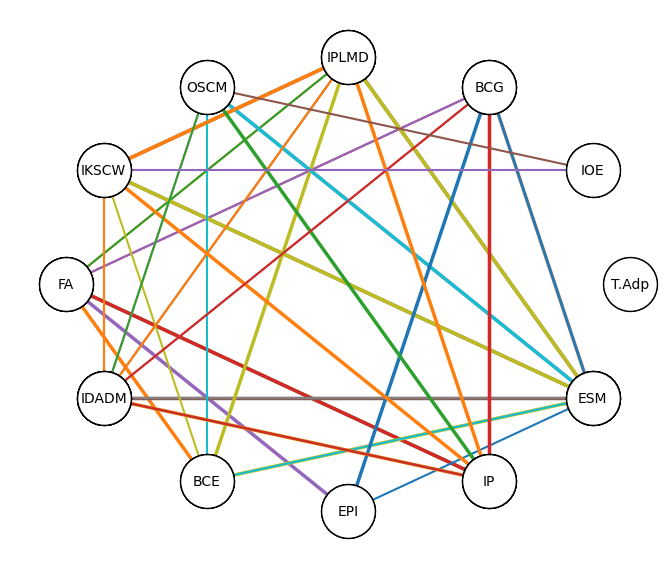

In [ ]:
#Maximal Clique
import matplotlib.colors as mcolors

colors = nx.get_edge_attributes(G, 'color').values()
weights = list(nx.get_edge_attributes(G, 'weight').values())

# Find all maximal cliques
maximal_cliques = list(nx.find_cliques(G))
sel_maximal_cliques=[]

# Display maximal cliques and the nodes that they consist of
required_cliques=0
print("Maximal Cliques:",required_cliques)
for clique in maximal_cliques:
  if len(clique)>required_cliques:
    sel_maximal_cliques.append(clique)
    print(clique)

# Draw the graph
pos = nx.circular_layout(G)

# Draw the graph with node labels
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1500, node_color='white',edgecolors='black',edge_color='white', width=weights)

# Define a list of colors to cycle through, here we take colors from matplotlib's tableau palette
color_list = list(mcolors.TABLEAU_COLORS.values())

# Highlight each maximal clique with a different color
for i, clique in enumerate(sel_maximal_cliques):
    color = color_list[i % len(color_list)]  # Cycle through the color list
    nx.draw_networkx_nodes(G, pos, label=clique, nodelist=clique,node_size=1500, node_color='white',edgecolors='black')
    subgraph = G.subgraph(clique)
    nx.draw_networkx_edges(G, pos, edgelist=subgraph.edges(), edge_color=color,width=weights)

plt.show()

['ESM', 'IDADM', 'IKSCW', 'IPLMD']


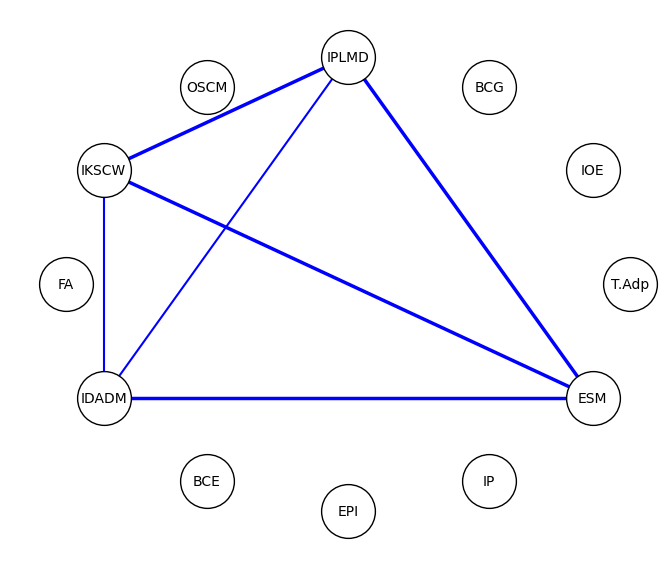

In [ ]:
#Maximum Clique
colors = nx.get_edge_attributes(G, 'color').values()
weights = list(nx.get_edge_attributes(G, 'weight').values())

# Find all maximal cliques
maximal_cliques = list(nx.find_cliques(G))
maximum_clique=list(max(maximal_cliques, key=len))
print(maximum_clique)

# Draw the graph
pos = nx.circular_layout(G)

# Draw the graph with node labels
nx.draw(G, pos, with_labels=True, font_size=10, node_size=1500, node_color='white',edgecolors='black',edge_color='white', width=weights)
subgraph = G.subgraph(maximum_clique)
nx.draw_networkx_edges(G, pos, edgelist=subgraph.edges(), edge_color='blue',width=weights)

plt.show()